In [2]:
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils import detect_sources
from asterism import data_dir
from astropy.io import  fits as pf
from photutils import detect_threshold
import matplotlib
%matplotlib inline  

image=pf.getdata(data_dir+'/deblending_img1.fits')

In [3]:
threshold = detect_threshold(image, snr=3.)


In [9]:
segm = detect_sources(image, threshold, npixels=5)

In [11]:
segm.labels

array([1, 2, 3])

In [12]:
import pylab as plt
plt.imshow(segm)

In [44]:
print np.unique(segm)

[0 1 2 3]


In [13]:
from photutils import deblend_sources

In [15]:
segm_deblend = deblend_sources(image, segm, npixels=5)

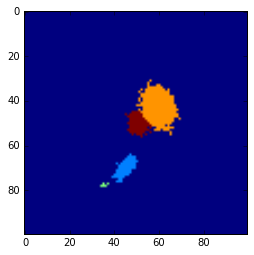

In [16]:
plt.imshow(segm_deblend)

In [17]:
from skimage.morphology import watershed
from skimage.feature import peak_local_max


In [61]:
local_maxi = peak_local_max(image, indices=False, footprint=np.ones((3, 3)),
                            labels=segm.data)
print local_maxi

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


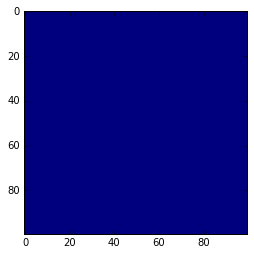

In [39]:
l=np.copy(local_maxi)
l[l==True]=1
l[l==False]=-100
plt.imshow(l)

In [62]:
from scipy import  ndimage as ndi
markers = ndi.label(local_maxi)[0]
print np.unique(markers)
labels = watershed(-image, markers, mask=segm.data)
print np.unique(labels)

[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]


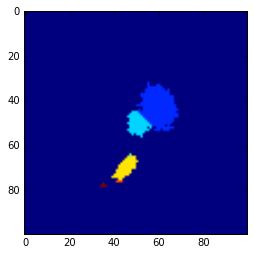

In [54]:
plt.imshow(labels)

In [29]:
from skimage.segmentation import  random_walker

In [30]:
labels = random_walker(image, markers, beta=10, mode='bf')

In [31]:
plt.imshow(labels)
